<a href="https://colab.research.google.com/github/navaneethkomuravelli/GenAI_2303A52374/blob/main/2374_genai_assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 - 64s - 34ms/step - accuracy: 0.9609 - loss: 0.1282 - val_accuracy: 0.9862 - val_loss: 0.0462
Epoch 2/30
1875/1875 - 77s - 41ms/step - accuracy: 0.9866 - loss: 0.0424 - val_accuracy: 0.9878 - val_loss: 0.0378
Epoch 3/30
1875/1875 - 80s - 43ms/step - accuracy: 0.9906 - loss: 0.0297 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 4/30
1875/1875 - 56s - 30ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9900 - val_loss: 0.0366
Epoch 5/30
1875/1875 - 55s - 29ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9909 - val_loss: 0.0305
Epoch 6/30
1875/1875 - 83s - 44ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9910 - val_loss: 0.0343
Epoch 7/30
1875/1875 - 83s - 44ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9907 - val_loss: 0.0348
Epoch 8/30
1875/1875 - 56s - 30ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accuracy: 0.9891 - val_loss: 0.0473
Epoch 9/30
1875/1875 - 83s - 44ms/step - accuracy: 0.9978 - loss: 0.0069 - val_a

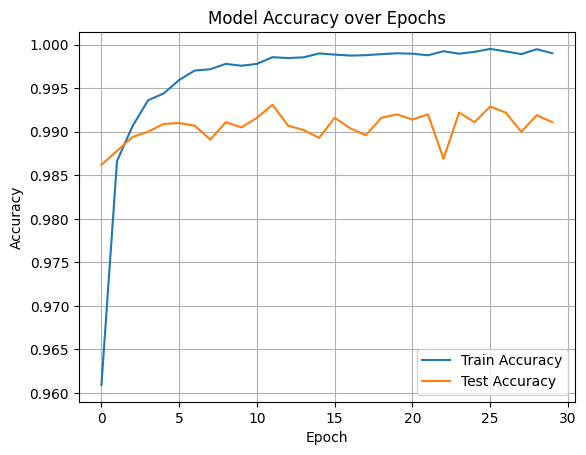

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build CNN model
model = Sequential([
    Conv2D(33, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=2
)

# Evaluate model
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()